In [81]:
import cv2

camera_img = cv2.imread("exit11.png")
map_img = cv2.imread("map.png")

gray1 = cv2.cvtColor(camera_img, cv2.COLOR_BGRA2GRAY)
gray2 = cv2.cvtColor(map_img, cv2.COLOR_BGRA2GRAY)


In [82]:
orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(gray1, None)
kp2, des2 = orb.detectAndCompute(gray2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

matches = sorted(matches, key=lambda x: x.distance)


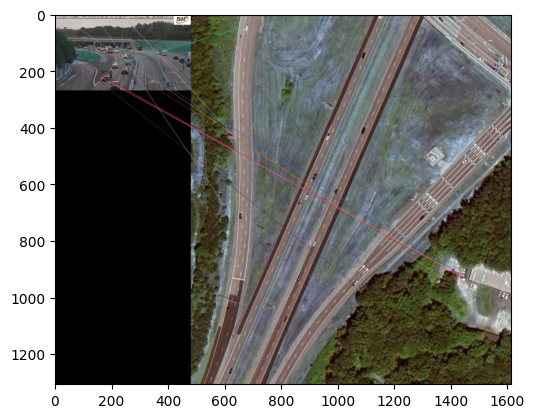

In [83]:
import matplotlib.pyplot as plot

img_matches = cv2.drawMatches(camera_img, kp1, map_img, kp2, matches[:10], None, 
                              flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

plot.imshow(img_matches)
plot.show()

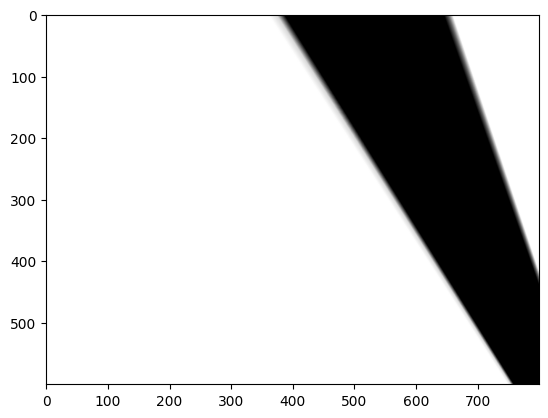

In [98]:
import numpy as np
pt1 = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
pt2 = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

H, mask = cv2.findHomography(pt1, pt2, cv2.RANSAC, 5.0)

img = cv2.imread('imgs/checkerboard.png')
height, width, _ = img.shape
img_aligned = cv2.warpPerspective(img, H, (width, height))

plot.imshow(img_aligned)
plot.show()


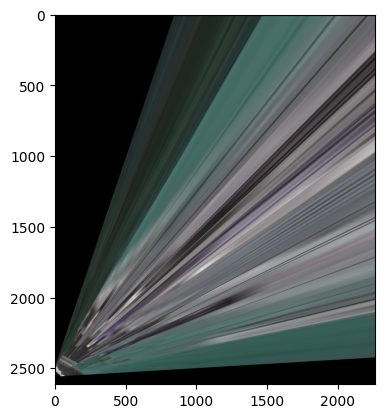

In [168]:
x = -550
y = 2150
# Define source and destination points
srcPoints = np.array([[118, 147], [137, 147], [118, 120], [137, 120]], dtype=np.float32)
dstPoints = np.array([[255 + x, 760 + y], [235 + x, 745 + y], [830 + x, 20 + y], [850 + x, 40 + y]], dtype=np.float32)

img = cv2.imread('exit11.png')
# Compute homography matrix
H, mask = cv2.findHomography(srcPoints, dstPoints, cv2.RANSAC, 5.0)
height, width, _ = cv2.imread('map.png').shape
img_aligned = cv2.warpPerspective(img, H, (width*2, height*2))

plot.imshow(img_aligned)
plot.show()

In [84]:
cv2.imwrite('matches.png', img_matches)

True

In [165]:
cv2.imwrite('aligned.png', img_aligned)

True

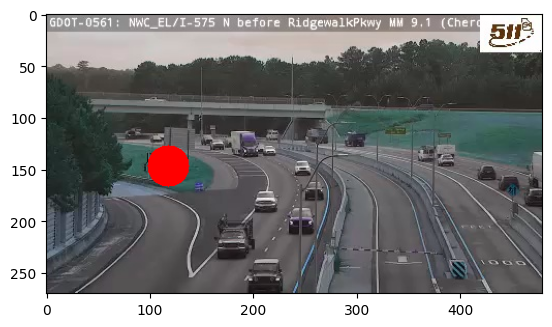

In [345]:
img = cv2.imread('exit11.png')
p1 = [118, 147]

height, width, _ = cv2.imread('map.png').shape
cv2.circle(img, center=p1, radius=20, color=(255, 0, 0), thickness=-1)
img2 = cv2.warpPerspective(img, H, (width*4, height*4))
plot.imshow(img)
plot.show()

In [ ]:
match = matches[6]

print(match)
print(match.distance)
print(match.imgIdx)
print(match.queryIdx)
print(match.trainIdx)
print(len(kp1))

img_points1 = cv2.drawKeypoints(gray1, kp1, None)

plot.imshow(img_points1)
plot.show()

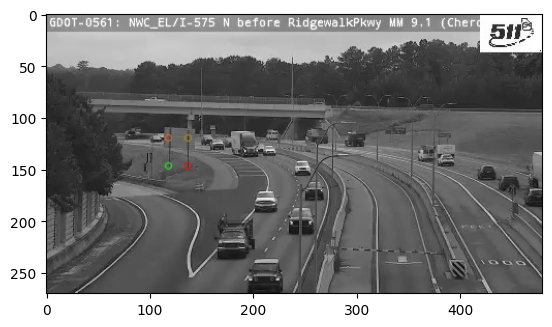

In [148]:
kpa = [cv2.KeyPoint(118, 147, 31), cv2.KeyPoint(137, 147, 31), cv2.KeyPoint(118, 120, 31), cv2.KeyPoint(137, 120, 31)]
img_points1 = cv2.drawKeypoints(gray1, kpa, None)

plot.imshow(img_points1)
plot.show()

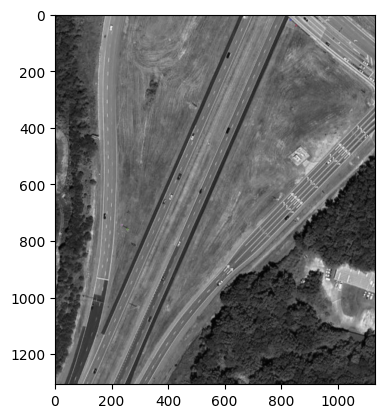

In [144]:
kpb = [cv2.KeyPoint(255, 760, 31), cv2.KeyPoint(235, 745, 31), cv2.KeyPoint(830, 20, 31), cv2.KeyPoint(850, 40, 31)]
img_points2 = cv2.drawKeypoints(gray2, kpb, None)

plot.imshow(img_points2)
plot.show()

In [68]:
print(matches)

[< cv2.DMatch 0x75b463f13eb0>, < cv2.DMatch 0x75b463f136d0>, < cv2.DMatch 0x75b463f78b10>, < cv2.DMatch 0x75b463f13e70>, < cv2.DMatch 0x75b463f127b0>, < cv2.DMatch 0x75b463f786d0>, < cv2.DMatch 0x75b463f11670>, < cv2.DMatch 0x75b463f11730>, < cv2.DMatch 0x75b463f11bb0>]


In [ ]:
import subprocess
import os

reader = cv2.VideoCapture("z.mp4")
total_frames = int(reader.get(cv2.CAP_PROP_FRAME_COUNT))
fps = reader.get(cv2.CAP_PROP_FPS)

shape = (int(reader.get(cv2.CAP_PROP_FRAME_WIDTH)), int(reader.get(cv2.CAP_PROP_FRAME_HEIGHT)))

output_file = "y.mp4"
intermediate_filemp4 = "__inter__.mp4"
writer = cv2.VideoWriter(intermediate_filemp4, cv2.VideoWriter_fourcc(*"mp4v"), fps, shape)

for frameid in range(total_frames):
    ret, frame = reader.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    kp, des = orb.detectAndCompute(gray, None)

    points = cv2.drawKeypoints(frame, kp, None)
    writer.write(points)
writer.release()

if os.path.exists(output_file):
    os.remove(output_file)
subprocess.run(["ffmpeg", "-i", intermediate_filemp4, output_file])
os.remove(intermediate_filemp4)


ffmpeg version 6.1.1-3ubuntu5 Copyright (c) 2000-2023 the FFmpeg developers
  built with gcc 13 (Ubuntu 13.2.0-23ubuntu3)
  configuration: --prefix=/usr --extra-version=3ubuntu5 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --disable-omx --enable-gnutls --enable-libaom --enable-libass --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libglslang --enable-libgme --enable-libgsm --enable-libharfbuzz --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-libzimg --ena

In [131]:
print(matches[0].queryIdx)
print(cv2.DMatch())

102
< cv2.DMatch 0x7123bd28ab90>
